<img src="30S.png" width="50%" alt="Image of 30S ribosomal subunit" style="float:right"/>

# Ribosomal Database Project

The Ribosomal Database Project (RDP) is a bioinformatics project that aims to provide a comprehensive database of ribosomal RNA (rRNA) sequences and related data for use in phylogenetic analysis and microbial ecology research. The project was initiated in 1984 by Carl Woese, a pioneer in the field of molecular evolution, and is currently maintained by a team of researchers at Michigan State University.

The RDP contains a curated database of rRNA sequences from bacteria, archaea, and eukaryotes. The database includes both 16S and 18S rRNA sequences, which are commonly used as molecular markers for bacterial and eukaryotic phylogenetic analysis, respectively. 

In this workshop, we'll use a curated file of approximately 15000 16S rDNA sequences.

# Retrieving your Sequences

The 16S sequences obtained by Nanopore sequencing have been provided in a csv file called `class_16S_sequences.csv`.

Samples were identified by using extra sequences known as 'barcodes' that were added to the PCR primers. Each sample was tagged with a unique combination from 8 forward and 15 reverse primer sequences - you noted these down in the lab in week 5 when you set up the PCR. Look up your 2 barcode references, for example A2 or F6. 

# Workshop tasks

Today's workshop is divided into 5 sections:
* Retrieving your 16S sequences
* Loading the reference 16S sequence database
* Searching for database matches
* Visualising your analysis results
* Evaluation and Reflection on Results

### Task 1: Retrieving your 16S sequences

1.1> Load the file 'Discovery_16S_consensus.csv' into a Pandas dataframe and explore the contents. 

1.2> Retrieve your 16S sequences from the Pandas dataframe using the `.query()` function by looking for rows that match your combination of forward and reverse primers. If there is no match for your group's 2 pairs of forward and reverse primers, run the code below to show which combinations of primers do have reads, then and and select one you like the look of for further analysis in this workshop. 
```python 
#load the dataframe
df=pd.read_csv("class_16S_sequences.csv")
# Create a contingency table of the forward and reverse indices
ct = pd.crosstab(df['reverse_primer'], df['forward_primer'])
print(ct)
#Add code below this that uses .query to filter the results for your combination of forward and reverse primers. 
```

1.3> Extract your 16S sequences to a list using `.tolist()`. From the list, extracting individual sequences using indexing (for example `my_sequences[0]` or `my_sequences[1]`).

```python
seq_list=my_sequences['consensus_sequence'].tolist()
seq_list[0])
```


In [50]:
import pandas as pd
df=pd.read_csv("class_16S_sequences.csv")
# Create a contingency table of the forward and reverse indices
ct = pd.crosstab(df['reverse_primer'], df['forward_primer'])
display(ct)

my_sequences = df.query("forward_primer=='A' and reverse_primer==2")

seq_list=my_sequences['consensus_sequence'].tolist()

seq_list[0]

forward_primer,A,B,C,D,E,F,G,H
reverse_primer,,,,,,,,
0,2,0,2,6,2,8,2,0
1,0,2,0,6,2,0,0,0
2,2,0,2,2,4,2,0,16
3,3,0,1,12,6,1,0,56
4,6,0,4,12,2,0,6,3
5,1,0,1,0,6,12,2,0
6,0,0,10,114,6,6,2,0
7,3,0,0,14,6,0,0,0
8,0,0,1,0,8,8,1,0


'GTATTGCTGATCACTCGCAGAGGGTTTGATTATGGCTCAGGACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGATGAAGCCCTTCGGGGTGGATTAGTGGCGAACGGGTGAGTAACACGTGGGCAATCTGCCCTTCACTCTGGGACAAGCCCTGGAAACGGGGTCTAATACCGGATAACACTTTCCCTCTCATGGGGGAAGGTTAAAAGCTCCGGCGGTGAAGGATGAGCCCGCGGCCTATCAGCTAGTTGGTGGGGTAATGGCCTACCAAGGCGACGACGGGTAGCCGGCCTGAGAGGGCGACCGGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGAAAGCCTGATGCAGCGACGCCGCGTGAGGGATGACGGCCTTCGGGTTGTAAACCTCTTTCAGCAGGGAAGAAGCGAAAGTGACGGTACCTGCAGAAGAAGCGCCGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGGCGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCTCGTAGGCGGCTTGTTGCGTCGGTTGTGAAAGCCCGGGGCTTAACCCCGGGTCTGCAGTCGATACGGGCAGGCTAGAGTGTGGTAGGGGAGATCGGAATTCCTGTGTAGCGGTGAAATGCGCAGATATCAGGAGGAACACCGGTGGCGAAGGCGGATCTCTGGGCCATTACTGACGCTGAGGAGCGAAAGCGTGGGGAGCGAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGTTGGGAACTAGGTGTTGGCGACATTCCACGTCGTCGGTGCCGCAGCTAACGCATTAAGTTCCCCGCCTGGGGAGTACGGCCGCAGGCTGAAACTCAAAGGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGTCTTGACATCCTCTGACAATCCTAGA

### Task 2: Loading the reference 16S sequence database

2.1> Load the 16S_reference.csv database file into a Pandas dataframe (use a different dataframe name to that you used when loading your sequences). This is a large version of the 'mini' dataframe you used last week. 

2.2> How many sequences are in the database?




In [14]:
reference_db=pd.read_csv("16S_reference.csv")
display(reference_db.head(5))

print(f"The reference file has {len(reference_db)} lines")

,id,sequence,species
0,Bacteria;Actinobacteria;Actinobacteria;Actinom...,GAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGGAAAGGTC...,Mycobacterium_heidelbergense(AJ000684)
1,Bacteria;Proteobacteria;Gammaproteobacteria;Vi...,GTTTGATCCTGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACAT...,Vibrio_atlanticus(EF599163)
2,Bacteria;Actinobacteria;Actinobacteria;Actinom...,TAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAAC...,Mycobacterium_aubagnense(AY859683)
3,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,AAGAGTTTGATCCTGGCTCAGAGCGAACGCTGGCGGCATGCTTAAC...,Acetobacter_senegalensis(AY883036)
4,Bacteria;Proteobacteria;Betaproteobacteria;Bur...,ATTGAACGCTGGCGGCATGCCTTACACATGCAAGTCGAACGGTAAC...,Aquincola_tertiaricarbonis(DQ656489)


The reference file has 15155 lines



### Task 3: Searching for database matches

3.1> For each query 16S sequence (i.e. for each of your own unknown 16S sequences), create a new column in the Pandas dataframe that represents the Levenshtein distance between that sequence and the sequences in the dataframe. The code you developed at the end of the week 7 workshop is close to what you will need to use here. Make sure that you create a different column name for the distance to each 16S sequence youre comparing to, for example 'dist_to_seq_1', 'dist_to_seq_2', etc. You can do this by run each of your group's sequences in turn, or each person can analyse a different one. If you're looking for an additional challenge, you could use a loop to process all sequences in your list of your group's sequences.

3.2> Identify the best match(es) for each sequence: how close is the match? Hint: to find the closest match, you'll need to identify which row has the minimum value in the respective distance column. You then need to use .query() to return the row with that value.  You can adapt the code you developed in the Week 8 exercise notebook to do this. 


In [6]:
!pip install levenshtein
#pip is a package manager:this command installs the levenshtein package on our Noteable instance.

In [20]:
from Levenshtein import distance

my_16S_sequence=seq_list[0]

reference_db['distance_to_seq0'] = reference_db['sequence'].apply(distance, args=(my_16S_sequence,))

display(reference_db.head())

,id,sequence,species,distance_to_seq0
0,Bacteria;Actinobacteria;Actinobacteria;Actinom...,GAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGGAAAGGTC...,Mycobacterium_heidelbergense(AJ000684),331
1,Bacteria;Proteobacteria;Gammaproteobacteria;Vi...,GTTTGATCCTGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACAT...,Vibrio_atlanticus(EF599163),420
2,Bacteria;Actinobacteria;Actinobacteria;Actinom...,TAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAAC...,Mycobacterium_aubagnense(AY859683),278
3,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,AAGAGTTTGATCCTGGCTCAGAGCGAACGCTGGCGGCATGCTTAAC...,Acetobacter_senegalensis(AY883036),435
4,Bacteria;Proteobacteria;Betaproteobacteria;Bur...,ATTGAACGCTGGCGGCATGCCTTACACATGCAAGTCGAACGGTAAC...,Aquincola_tertiaricarbonis(DQ656489),432


In [51]:
#Get the minimum value in distance_to_seq0
min_value=reference_db.distance_to_seq0.min()
print(f'The minimum distance is {min_value}')
#Look up row with minimum value, and return entry in species column. 
reference_db.query("distance_to_seq0==@min_value")['species']


The minimum distance is 192


14568    CCTTTAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCT...
Name: sequence, dtype: object

In [31]:
# Alternatives

#One line (combine the two step method above into a single line)
reference_db.query("distance_to_seq0==@reference_db.distance_to_seq0.min()")['species']



14568    Streptomyces_purpureus(NR_118010.1)
Name: species, dtype: object

# Task 4: Visualising your analysis results

4.1> Run a needleman_wunsch alignment between your 16S sequence(s) and the best match. Python code to run an Needleman Wunsch alignment is shown below. You'll need to extract your own 16S sequence and the best match 16S sequence as strings before you can align them. 
4.2> View the alignment. How well is the sequence aligned? Can you see poorer alignment at the ends of the sequence caused by the presence of PCR primers in your sequence?

Hint: If you're struggling with getting the sequence to convert to a string and you are seeing the text 'Name: sequence, dtype: object' when you print it, try suffixing the expression with .iloc[0]. This extracts the string from the Pandas data series.

An example code for running a Needleman-Wunsch alignment is shown below:

```python
import needleman_wunsch
seq1='ATGCTGAGCTAGCGGCTATATTCTATCGGGAGCGATTTACTACTC'
seq2='ATGCTAGGTAGCGGACTATATACTATCGCGAGCGATTAACTAGCC'
print(needleman_wunsch.align(seq1, seq2))
```
Expected output:
```
seq1: ATGCTGAGCTAGCGG-CTATATTCTATCGGGAGCGATTTACTA-CTC
      ||||| || |||||| |||||| |||||| |||||||| |||| | |
seq2: ATGCT-AGGTAGCGGACTATATACTATCGCGAGCGATTAACTAGC-C
```



In [42]:
import needleman_wunsch

my_16S_sequence=seq_list[0]
best_match=reference_db.query("distance_to_seq0==@reference_db.distance_to_seq0.min()")['sequence'].iloc[0]
print(needleman_wunsch.align(my_16S_sequence, best_match))

seq1: GTATTGCTGATCACTCGCAGAGGGTTTGATTATGGCTCAGGACGAACGCTGGCGGCGTGCTTAACACATG
            ||  |   |   |||  |||||||  ||||||||||||||||||||||||||||||||||||||
seq2: -----CCT--T---T---AGA--GTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAACACATG

seq1: CAAGTCGAACGATGAAGC-CCTTCGGG-GTGGATTAGTGGCGAACGGGTGAGTAACACGTGGGCAATCTG
      |||||||||||||||| | |||||||| | ||||||||||||||||||||||||||||||||||||||||
seq2: CAAGTCGAACGATGAACCTCCTTCGGGAGGGGATTAGTGGCGAACGGGTGAGTAACACGTGGGCAATCTG

seq1: CCCTTCACTCTGGGACAAGCCCTGGAAACGGGGTCTAATACCGGATAACACTTTCC-CTCTCATGGGGGA
      |||||||||||||||||||||||||||||||||||||||||||||||||||   || | | |||||    
seq2: CCCTTCACTCTGGGACAAGCCCTGGAAACGGGGTCTAATACCGGATAACACCGGCCTC-CGCATGGgggC

seq1: AGGTTAAAAGCTCCGGCGGTGAAGGATGAGCCCGCGGCCTATCAGCTAGTTGGTGGGGTAATGGCCTACC
       |||| ||||||||||||||||||||||||||||||||||||||||| ||||||||||||||||||||||
seq2: TGGTTGAAAGCTCCGGCGGTGAAGGATGAGCCCGCGGCCTATCAGCTTGTTGGTGGGGTAATGGCCTACC

seq1: AAGGCGACGACGGGTAGCCGGCCTGAGAGGGCGACCGGCCACACTGGGACTGAGACACGGCCCAGA

### Evaluation and Reflection on Results

7. Draw a histogram of the sequence distances between your group's 16S sequence(s) and each of the sequences in the database. What is the species that has the most distant sequence in the database for your 16S sequence? Does that make sense when put into the context of the tree of life?
8. Is the species you've identified known to produce antimicrobial compounds? 
9. Do you think that the species classification has been accurately predicted? What factors could affect the accuracy of your sequencing hit?


The most distance species is 14321    Planktothrix_suspensa(NR_125522.1)
Name: species, dtype: object


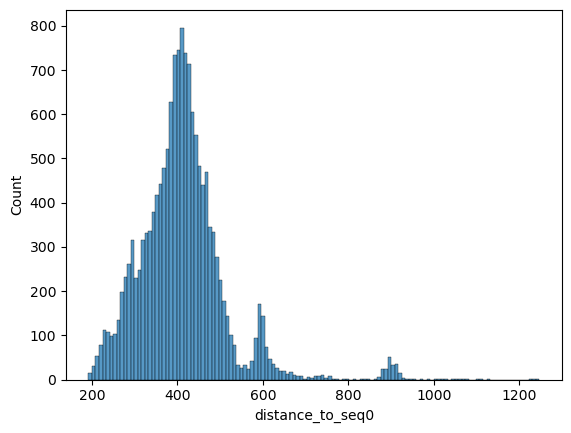

In [49]:
import seaborn as sns

sns.histplot(data=reference_db, x='distance_to_seq0');

most_distant=reference_db.query("distance_to_seq0==@reference_db.distance_to_seq0.max()")['species']

print(f"The most distance species is {most_distant}")